# image processing of high harmonics image


## load def

In [2]:
from pylab import *
#from mpldatacursor import datacursor
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import pandas as pd
%matplotlib inline


## load data

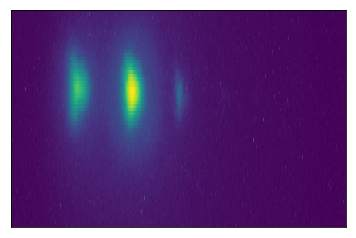

In [3]:
datan = np.load('./data/datan.npy')
imshow(datan.T,aspect='auto',norm=LogNorm())
xticks([])
yticks([])
plt.show()

## apply PCA

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
xm = pca.fit_transform(datan.T)
xm_re= pca.inverse_transform(xm)

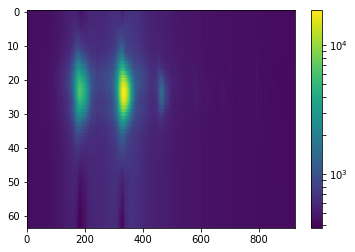

In [5]:
imshow(xm_re,aspect='auto',norm=LogNorm())
colorbar()

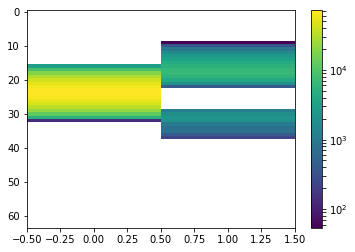

In [6]:
# show where it find the most important feature
imshow(xm,aspect='auto',norm=LogNorm())
colorbar()

In [7]:
# save model and pca
from sklearn.externals import joblib
joblib.dump(pca, './data/pca.pkl') 
np.save('./data/xm',xm)

### testing retrieval

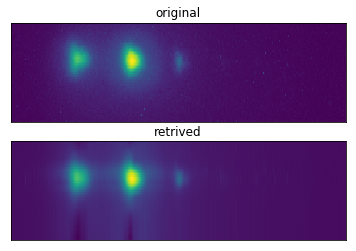

In [42]:
from sklearn.externals import joblib
subplot(211)
imshow(datan.T,aspect='auto',norm=LogNorm())
xticks([])
yticks([])
title('original')

pca = joblib.load('./data/pca.pkl') 
xm1 = load('./data/xm.npy')
xm1_re= pca.inverse_transform(xm1)
subplot(212)
imshow(xm1_re,aspect='auto',norm=LogNorm())
title('retrived')
xticks([])
yticks([])
savefig('./images/original_vs_retrived.png')
plt.show()


## edge detection

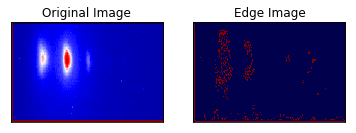

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/datan.jpg',0)
edges = cv2.Canny(img,10,100)

plt.subplot(121),plt.imshow(img,cmap = 'seismic')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'seismic')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
savefig('./images/edge.png')
plt.show()

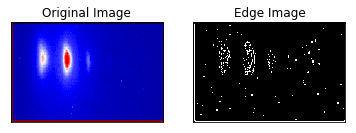

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/datan.jpg',0)
v = np.median(img)
sigma=0

lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edges = cv2.Canny(img, lower, upper)
plt.subplot(121),plt.imshow(img,cmap = 'seismic')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


## k means (vector quantization)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
n_colors = 5
X = datan.reshape((-1, 1))  # We need an (n_sample, n_feature) array

In [28]:
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(X)

In [29]:
values = kmeans.cluster_centers_.squeeze()
labels = kmeans.labels_

In [30]:
# create an array from labels and values
data_compressed = np.choose(labels, values)
data_compressed.shape = datan.shape

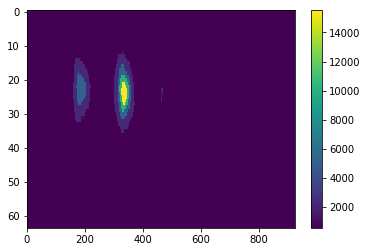

In [33]:
imshow(data_compressed.T,aspect='auto')
colorbar()
savefig('./images/kmeans.png')

